In [5]:
url = "https://archive-api.open-meteo.com/v1/archive?latitude=48.776&longitude=2.2906&start_date=2006-01-01&end_date=2010-12-31&hourly=temperature_2m,relative_humidity_2m,precipitation"


In [44]:
import requests
import pandas as pd

# Parameters
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 48.776,
    "longitude": 2.2906,
    "start_date": "2006-01-01",
    "end_date": "2010-12-31",
    "hourly": "temperature_2m,relative_humidity_2m,precipitation",
    "timezone": "Europe/Paris"
}

# API call
response = requests.get(url, params=params)
weather_json = response.json()

# Convert to DataFrame
weather_df = pd.DataFrame(weather_json['hourly'])
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df['time']=weather_df['time'].dt.floor('h')
weather_df.head()


,time,temperature_2m,relative_humidity_2m,precipitation
0,2006-01-01 00:00:00,3.7,92,0.0
1,2006-01-01 01:00:00,3.7,91,0.0
2,2006-01-01 02:00:00,3.4,92,0.0
3,2006-01-01 03:00:00,2.9,93,0.0
4,2006-01-01 04:00:00,2.7,94,0.0


In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  43824 non-null  datetime64[ns]
 1   temperature_2m        43824 non-null  float64       
 2   relative_humidity_2m  43824 non-null  int64         
 3   precipitation         43824 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.3 MB


In [13]:
weather_df.isnull().sum()

time                    0
temperature_2m          0
relative_humidity_2m    0
precipitation           0
dtype: int64

In [31]:
df = pd.read_csv(
    "C:/Users/Vedit/Downloads/individual+household+electric+power+consumption/household_power_consumption.txt",
    sep=';',
    low_memory=False,
    
)

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [86]:
df['datetime']=pd.to_datetime(df['Date']+' '+df['Time'], format='%d/%m/%Y %H:%M:%S')
#df['datetime']=df['datetime'].dt.floor('H')
#df.head()
# Convert relevant power columns to numeric
cols_to_convert = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [89]:
df['hour'] = df['datetime'].dt.floor('h')
df_hourly=df.groupby('hour').mean(numeric_only=True).reset_index()

In [91]:
merged_df=pd.merge(df_hourly,weather_df,left_on='hour',right_on='time',how='left')

In [93]:
merged_df.head()

,hour,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,time,temperature_2m,relative_humidity_2m,precipitation
0,2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,2006-12-16 17:00:00,7.4,95,1.0
1,2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,2006-12-16 18:00:00,6.7,93,0.8
2,2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,2006-12-16 19:00:00,6.4,93,0.2
3,2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,2006-12-16 20:00:00,6.2,92,0.0
4,2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,2006-12-16 21:00:00,5.9,91,0.0


In [95]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34589 entries, 0 to 34588
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   hour                   34589 non-null  datetime64[ns]
 1   Global_active_power    34168 non-null  float64       
 2   Global_reactive_power  34168 non-null  float64       
 3   Voltage                34168 non-null  float64       
 4   Global_intensity       34168 non-null  float64       
 5   Sub_metering_1         34168 non-null  float64       
 6   Sub_metering_2         34168 non-null  float64       
 7   Sub_metering_3         34168 non-null  float64       
 8   time                   34589 non-null  datetime64[ns]
 9   temperature_2m         34589 non-null  float64       
 10  relative_humidity_2m   34589 non-null  int64         
 11  precipitation          34589 non-null  float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 3.2

In [97]:
merged_df.isnull().sum()

hour                       0
Global_active_power      421
Global_reactive_power    421
Voltage                  421
Global_intensity         421
Sub_metering_1           421
Sub_metering_2           421
Sub_metering_3           421
time                       0
temperature_2m             0
relative_humidity_2m       0
precipitation              0
dtype: int64

In [103]:
power_cols=[ 'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
merged_df_cleaned = merged_df.dropna(subset=power_cols,how='all')

In [105]:
merged_df_cleaned.isnull().sum()

hour                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
time                     0
temperature_2m           0
relative_humidity_2m     0
precipitation            0
dtype: int64

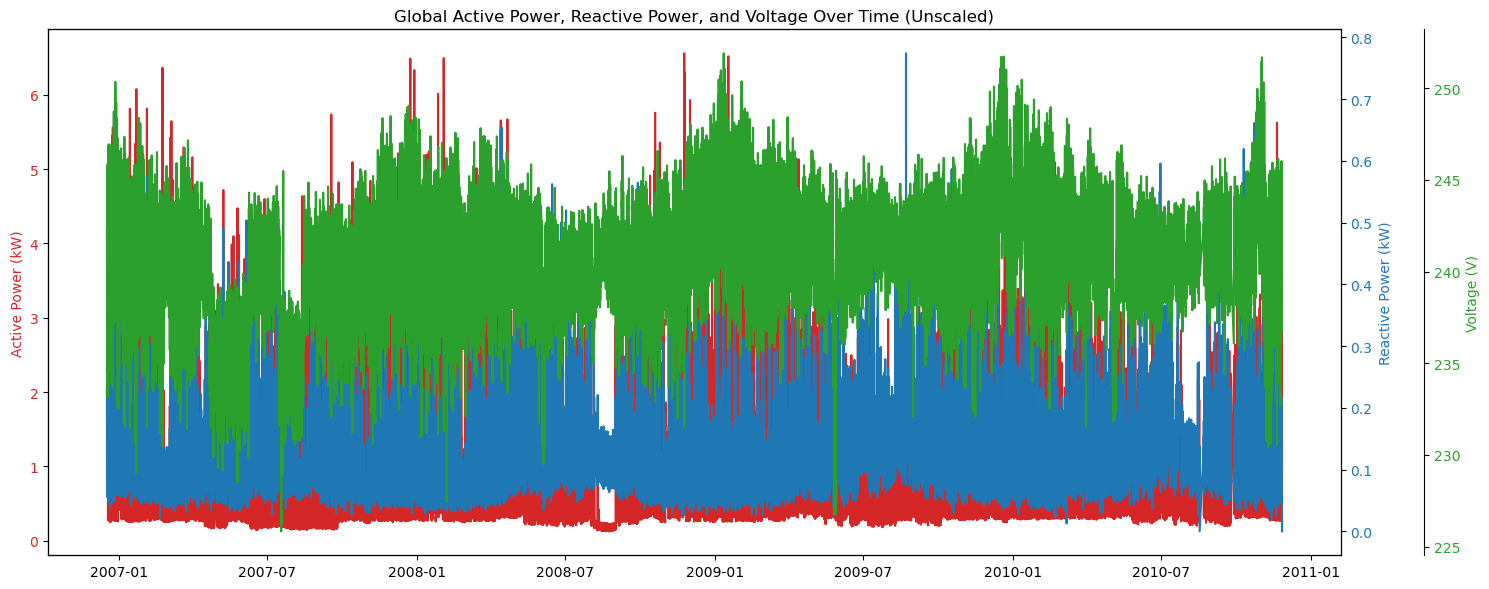

In [107]:
import matplotlib.pyplot as plt

# Filter out rows with NaN in any of the three columns
plot_df = merged_df_cleaned[['hour', 'Global_active_power', 'Global_reactive_power', 'Voltage']].dropna()

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot Global_active_power
ax1.plot(plot_df['hour'], plot_df['Global_active_power'], color='tab:red', label='Global Active Power')
ax1.set_ylabel('Active Power (kW)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Second axis (reactive power) sharing same x-axis
ax2 = ax1.twinx()
ax2.plot(plot_df['hour'], plot_df['Global_reactive_power'], color='tab:blue', label='Reactive Power')
ax2.set_ylabel('Reactive Power (kW)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Third axis for Voltage — need to shift it right a bit
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))  # Offset third axis
ax3.plot(plot_df['hour'], plot_df['Voltage'], color='tab:green', label='Voltage')
ax3.set_ylabel('Voltage (V)', color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and layout
plt.title('Global Active Power, Reactive Power, and Voltage Over Time (Unscaled)')
fig.tight_layout()
plt.show()


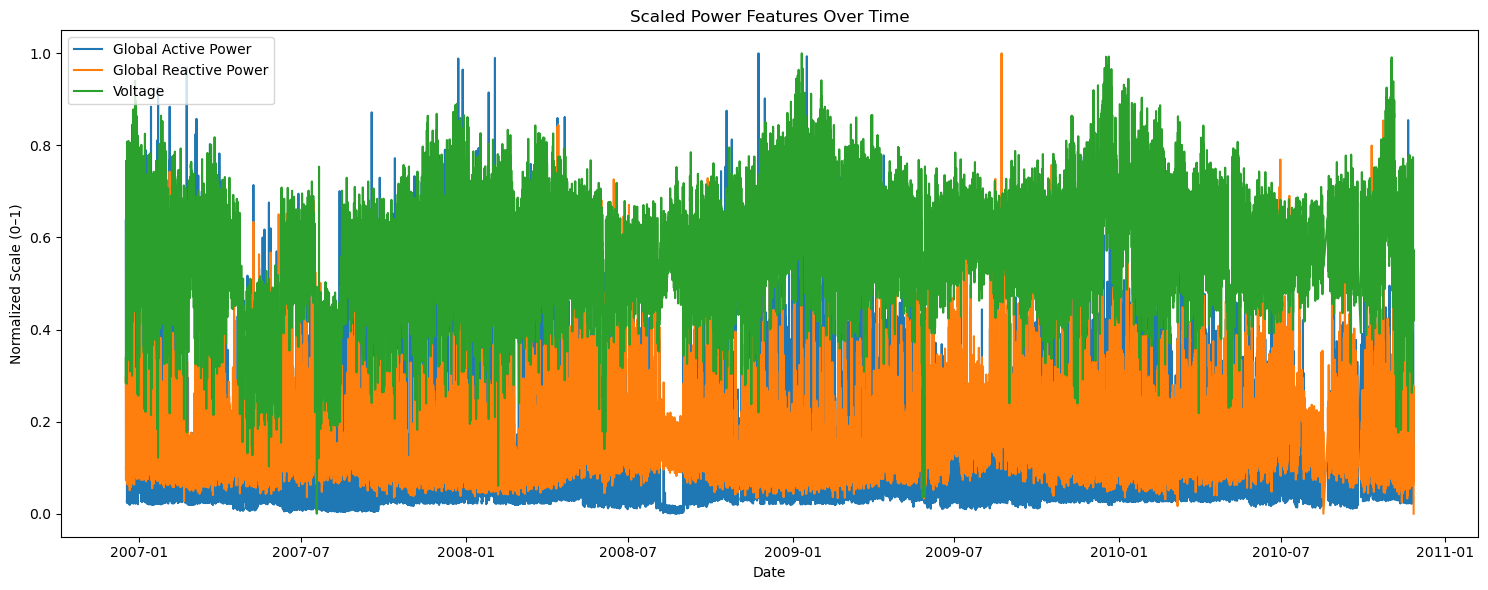

In [109]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Select only the columns you want to normalize
plot_df = merged_df_cleaned[['hour', 'Global_active_power', 'Global_reactive_power', 'Voltage']].copy()

# Drop rows with any NaNs in these columns
plot_df.dropna(inplace=True)

# Normalize values using MinMaxScaler (0 to 1)
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(plot_df[['Global_active_power', 'Global_reactive_power', 'Voltage']])

# Add scaled columns back to the DataFrame
plot_df[['scaled_active', 'scaled_reactive', 'scaled_voltage']] = scaled_values

# Plot
plt.figure(figsize=(15, 6))
plt.plot(plot_df['hour'], plot_df['scaled_active'], label='Global Active Power')
plt.plot(plot_df['hour'], plot_df['scaled_reactive'], label='Global Reactive Power')
plt.plot(plot_df['hour'], plot_df['scaled_voltage'], label='Voltage')

plt.title('Scaled Power Features Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Scale (0–1)')
plt.legend()
plt.tight_layout()
plt.show()


In [111]:
merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34168 entries, 0 to 34588
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   hour                   34168 non-null  datetime64[ns]
 1   Global_active_power    34168 non-null  float64       
 2   Global_reactive_power  34168 non-null  float64       
 3   Voltage                34168 non-null  float64       
 4   Global_intensity       34168 non-null  float64       
 5   Sub_metering_1         34168 non-null  float64       
 6   Sub_metering_2         34168 non-null  float64       
 7   Sub_metering_3         34168 non-null  float64       
 8   time                   34168 non-null  datetime64[ns]
 9   temperature_2m         34168 non-null  float64       
 10  relative_humidity_2m   34168 non-null  int64         
 11  precipitation          34168 non-null  float64       
dtypes: datetime64[ns](2), float64(9), int64(1)
memory usage: 3.4 MB


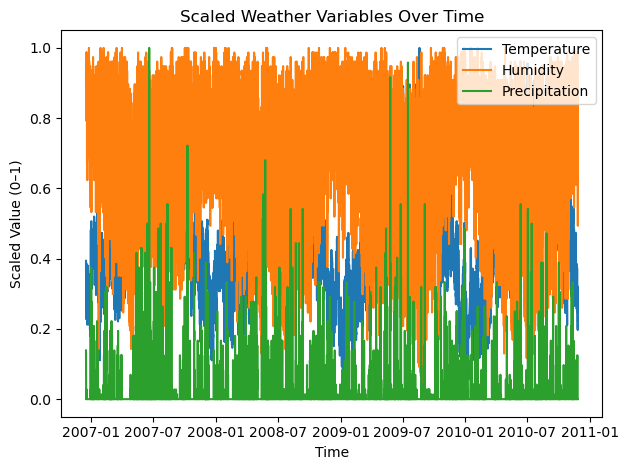

In [119]:
plot_dfw=merged_df_cleaned[['hour','temperature_2m','relative_humidity_2m','precipitation']].copy()
plot_dfw.dropna(inplace=True)
scaler=MinMaxScaler()
scaler_valuesw=scaler.fit_transform(plot_dfw[['temperature_2m','relative_humidity_2m','precipitation']])
plot_dfw[['scaled_temperature_2m','scaled_relative_humidity_2m','scaled_precipitation']]=scaler_valuesw
plt.plot(plot_dfw['hour'], plot_dfw['scaled_temperature_2m'], label='Temperature')
plt.plot(plot_dfw['hour'], plot_dfw['scaled_relative_humidity_2m'], label='Humidity')
plt.plot(plot_dfw['hour'], plot_dfw['scaled_precipitation'], label='Precipitation')

plt.title('Scaled Weather Variables Over Time')
plt.xlabel('Time')
plt.ylabel('Scaled Value (0–1)')
plt.legend()
plt.tight_layout()
plt.show()


In [121]:
cols = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'temperature_2m', 'relative_humidity_2m', 'precipitation'
]


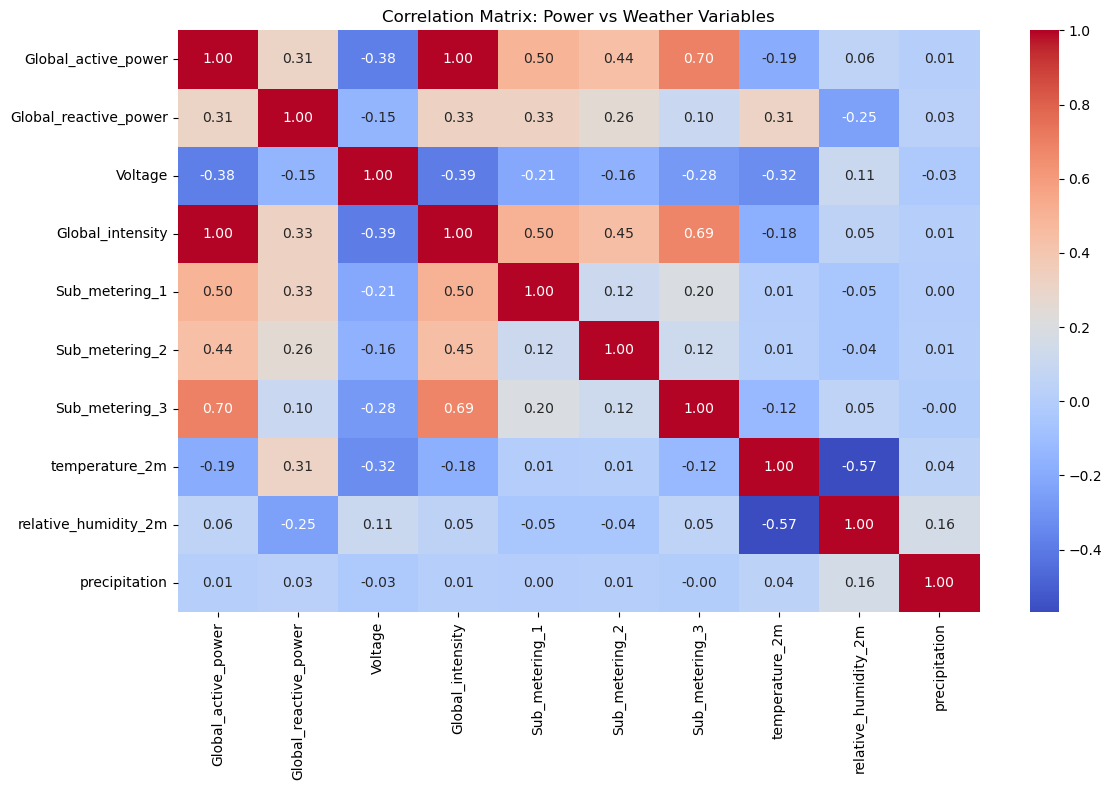

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset and drop rows with any NaNs
corr_df = merged_df_cleaned[cols].dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Power vs Weather Variables')
plt.tight_layout()
plt.show()


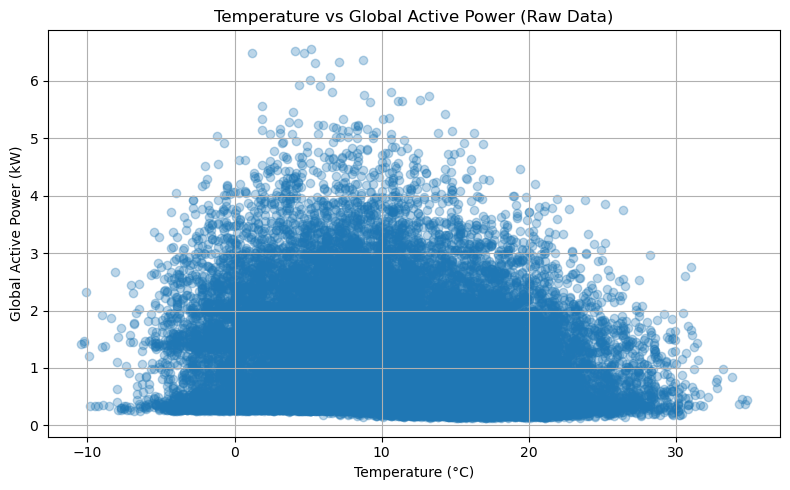

In [125]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(merged_df_cleaned['temperature_2m'], merged_df_cleaned['Global_active_power'], alpha=0.3)
plt.title('Temperature vs Global Active Power (Raw Data)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()


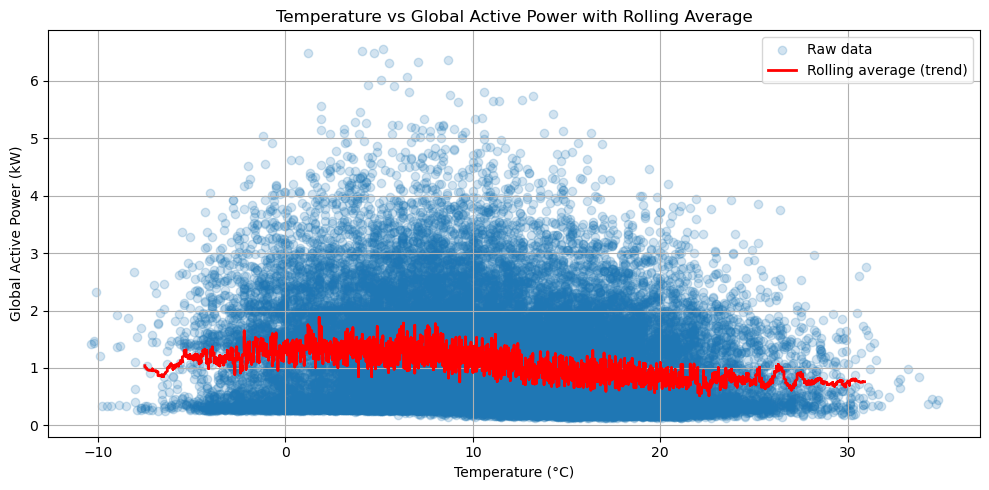

In [127]:

# Copy and sort by temperature
temp_df = merged_df_cleaned[['temperature_2m', 'Global_active_power']].dropna().sort_values('temperature_2m')

# Rolling average of power (window of 50 points)
temp_df['rolling_power'] = temp_df['Global_active_power'].rolling(window=50, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(temp_df['temperature_2m'], temp_df['Global_active_power'], alpha=0.2, label='Raw data')
plt.plot(temp_df['temperature_2m'], temp_df['rolling_power'], color='red', label='Rolling average (trend)', linewidth=2)
plt.title('Temperature vs Global Active Power with Rolling Average')
plt.xlabel('Temperature (°C)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


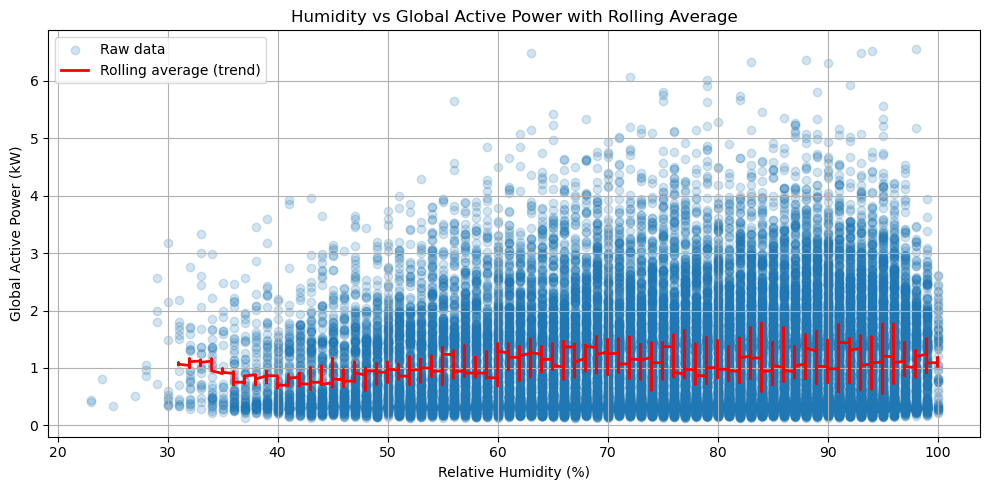

In [131]:
# Prepare and sort by humidity
hum_df = merged_df_cleaned[['relative_humidity_2m', 'Global_active_power']].dropna().sort_values('relative_humidity_2m')

# Rolling average
hum_df['rolling_power'] = hum_df['Global_active_power'].rolling(window=50, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(hum_df['relative_humidity_2m'], hum_df['Global_active_power'], alpha=0.2, label='Raw data')
plt.plot(hum_df['relative_humidity_2m'], hum_df['rolling_power'], color='red', linewidth=2, label='Rolling average (trend)')
plt.title('Humidity vs Global Active Power with Rolling Average')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


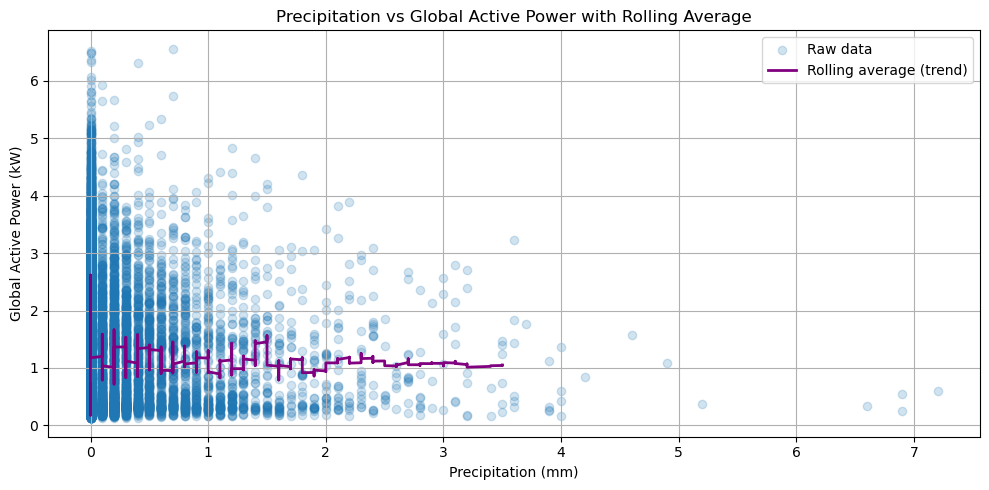

In [133]:
# Prepare and sort by precipitation
prec_df = merged_df_cleaned[['precipitation', 'Global_active_power']].dropna().sort_values('precipitation')

# Rolling average
prec_df['rolling_power'] = prec_df['Global_active_power'].rolling(window=50, center=True).mean()

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(prec_df['precipitation'], prec_df['Global_active_power'], alpha=0.2, label='Raw data')
plt.plot(prec_df['precipitation'], prec_df['rolling_power'], color='purple', linewidth=2, label='Rolling average (trend)')
plt.title('Precipitation vs Global Active Power with Rolling Average')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [183]:
daily_df = merged_df_cleaned.set_index('hour').resample('D').mean().reset_index()
# Create lagged weather columns (1 day ago)
daily_df['temp_lag1'] = daily_df['temperature_2m'].shift(20)
daily_df['humidity_lag1'] = daily_df['relative_humidity_2m'].shift(1)
daily_df['precip_lag1'] = daily_df['precipitation'].shift(1)


In [185]:
# Correlation between today’s power and yesterday’s weather
corrs = daily_df[['Global_active_power', 'temp_lag1', 'humidity_lag1', 'precip_lag1']].corr()
print(corrs['Global_active_power'])


Global_active_power    1.000000
temp_lag1             -0.491050
humidity_lag1          0.415272
precip_lag1           -0.002051
Name: Global_active_power, dtype: float64


In [ ]:
shift 20 it is changing

In [187]:
from sklearn.preprocessing import StandardScaler

weather_features = ['temperature_2m', 'relative_humidity_2m', 'precipitation']
weather_data = daily_df[weather_features].dropna()

# Scale
scaler = StandardScaler()
scaled_weather = scaler.fit_transform(weather_data)


In [193]:
from sklearn.cluster import KMeans


# Try 3 clusters to start
kmeans = KMeans(n_clusters=3, random_state=42)
weather_data['cluster'] = kmeans.fit_predict(scaled_weather)


C:\Users\Vedit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [195]:
# Add cluster info to daily_df
daily_df = daily_df.loc[weather_data.index]  # align indexes
daily_df['weather_cluster'] = weather_data['cluster']


C:\Users\Vedit\AppData\Local\Temp\ipykernel_6324\213757752.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_df, x='weather_cluster', y='Global_active_power', palette='Set2')


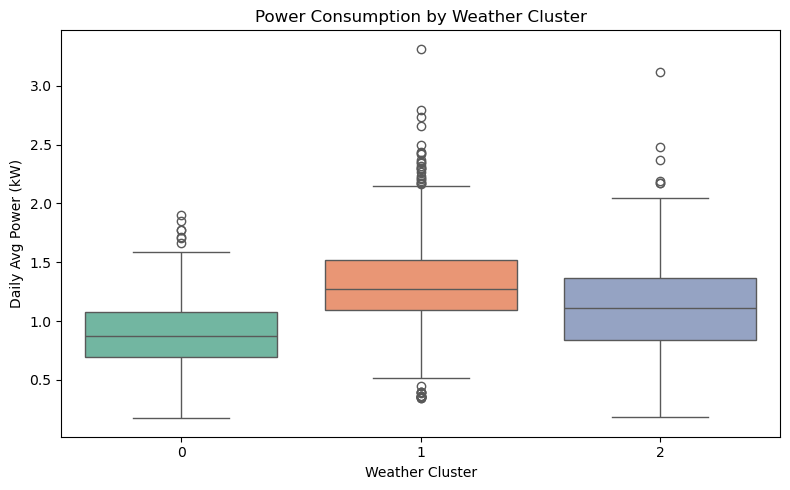

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=daily_df, x='weather_cluster', y='Global_active_power', palette='Set2')
plt.title('Power Consumption by Weather Cluster')
plt.xlabel('Weather Cluster')
plt.ylabel('Daily Avg Power (kW)')
plt.tight_layout()
plt.show()


In [199]:
cluster_profiles = daily_df.groupby('weather_cluster')[weather_features + ['Global_active_power']].mean()
print(cluster_profiles)


                 temperature_2m  relative_humidity_2m  precipitation  \
weather_cluster                                                        
0                     15.911239             68.737774       0.024627   
1                      5.724238             83.297856       0.036309   
2                     12.275504             83.576394       0.375469   

                 Global_active_power  
weather_cluster                       
0                           0.877981  
1                           1.317519  
2                           1.128991  
